In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.listdir('/content/drive/MyDrive/CNN/horses'))

['horse-65.jpg', 'horse-159.jpg', 'horse-2.jpg', 'horse-168.jpg', 'horse-166.jpg', 'horse-52.jpg', 'horse-87.jpg', 'horse-92.jpg', 'horse-148.jpg', 'horse-78.jpg', 'horse-7.jpg', 'horse-88.jpg', 'horse-31.jpg', 'horse-162.jpg', 'horse-5.jpg', 'horse-188.jpg', 'horse-176.jpg', 'horse-82.jpg', 'horse-3.jpg', 'horse-186.jpg', 'horse-153.jpg', 'horse-50.jpg', 'horse-96.jpg', 'horse-48.jpg', 'horse-55.jpg', 'horse-35.jpg', 'horse-84.jpg', 'horse-64.jpg', 'horse-199.jpg', 'horse-38.jpg', 'horse-200.jpg', 'horse-158.jpg', 'horse-53.jpg', 'horse-93.jpg', 'horse-41.jpg', 'horse-171.jpg', 'horse-59.jpg', 'horse-20.jpg', 'horse-47.jpg', 'horse-90.jpg', 'horse-67.jpg', 'horse-182.jpg', 'horse-68.jpg', 'horse-146.jpg', 'horse-63.jpg', 'horse-190.jpg', 'horse-76.jpg', 'horse-151.jpg', 'horse-189.jpg', 'horse-37.jpg', 'horse-160.jpg', 'horse-179.jpg', 'horse-43.jpg', 'horse-152.jpg', 'horse-83.jpg', 'horse-99.jpg', 'horse-156.jpg', 'horse-167.jpg', 'horse-26.jpg', 'horse-141.jpg', 'horse-74.jpg', 'ho

In [3]:
folders = os.listdir('/content/drive/MyDrive/CNN')

In [4]:
folders

['cats', 'dogs', 'horses', 'humans']

In [5]:
path = '/content/drive/MyDrive/CNN/'
for i in folders:
  print(i, len(os.listdir(path+i)))

cats 181
dogs 181
horses 181
humans 181


In [6]:
import keras.utils as image
import matplotlib.pyplot as plt

In [7]:
img = image.load_img('/content/drive/MyDrive/CNN/horses/horse-52.jpg')

In [8]:
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [9]:
img = image.img_to_array(img)/255

In [10]:
img.shape

(177, 284, 3)

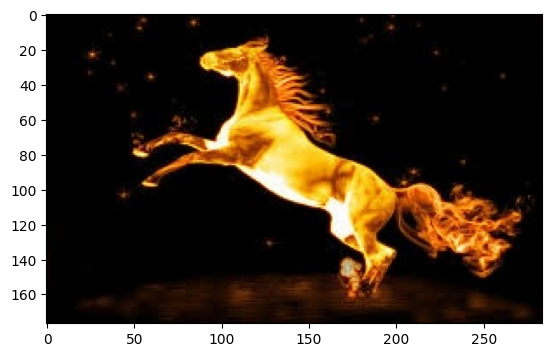

In [11]:
plt.imshow(img)
plt.show()

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_set = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

In [14]:
train_gen = train_set.flow_from_directory(path,
                                         target_size = (224, 224),
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [15]:
for i, j in train_gen:
    print(i.shape, j.shape)
    break

(32, 224, 224, 3) (32, 4)


[0. 1. 0. 0.]


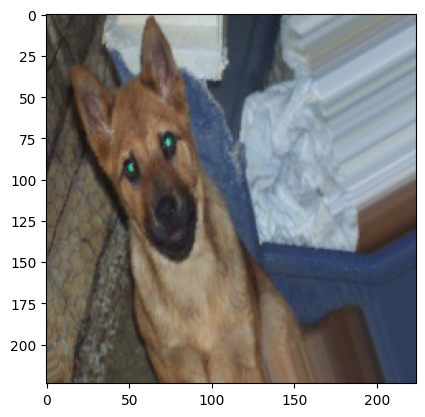

In [19]:
plt.imshow(i[26])
print(j[26])

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np

In [21]:
base_model = ResNet50(weights='imagenet', include_top = False, input_shape = (224, 224, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [22]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [23]:
for layer in base_model.layers:
    layer.trainable = True

In [24]:
output = base_model.output
output = GlobalAveragePooling2D()(output)
output = Dense(4, activation = 'softmax')(output)

In [25]:
model = Model(inputs = base_model.input, outputs = output)

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [27]:
import tensorflow as tf
from tensorflow.keras import optimizers
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

In [28]:
hist = model.fit_generator(train_gen, epochs = 25)

<ipython-input-28-903ea41fe139>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_gen, epochs = 25)


Epoch 1/25
23/23 [==============================] - 368s 15s/step - loss: 1.2450 - accuracy: 0.6298
Epoch 2/25
23/23 [==============================] - 344s 15s/step - loss: 0.7772 - accuracy: 0.7334
Epoch 3/25
23/23 [==============================] - 345s 15s/step - loss: 0.6258 - accuracy: 0.7804
Epoch 4/25
23/23 [==============================] - 347s 15s/step - loss: 0.4716 - accuracy: 0.8094
Epoch 5/25
23/23 [==============================] - 347s 15s/step - loss: 0.3885 - accuracy: 0.8702
Epoch 6/25
23/23 [==============================] - 346s 15s/step - loss: 0.3469 - accuracy: 0.8729
Epoch 7/25
23/23 [==============================] - 348s 15s/step - loss: 0.2102 - accuracy: 0.9296
Epoch 8/25
23/23 [==============================] - 346s 15s/step - loss: 0.2566 - accuracy: 0.9047
Epoch 9/25
23/23 [==============================] - 348s 15s/step - loss: 0.1898 - accuracy: 0.9337
Epoch 10/25
23/23 [==============================] - 346s 15s/step - loss: 0.1760 - accuracy: 0.9351

In [29]:
hist.history

{'loss': [1.2449795007705688,
  0.7772213220596313,
  0.6257678270339966,
  0.47163257002830505,
  0.3884851932525635,
  0.34690549969673157,
  0.21016712486743927,
  0.25662535429000854,
  0.18982955813407898,
  0.17603863775730133,
  0.1653614193201065,
  0.20131196081638336,
  0.16998350620269775,
  0.1933276355266571,
  0.1512000858783722,
  0.20126204192638397,
  0.13984261453151703,
  0.15316741168498993,
  0.16501741111278534,
  0.13438501954078674,
  0.21816211938858032,
  0.15468773245811462,
  0.1466338336467743,
  0.14802351593971252,
  0.13100048899650574],
 'accuracy': [0.6298342347145081,
  0.7334254384040833,
  0.780386745929718,
  0.8093922734260559,
  0.8701657652854919,
  0.8729282021522522,
  0.9295580387115479,
  0.9046961069107056,
  0.9337016344070435,
  0.9350828528404236,
  0.939226508140564,
  0.9254143834114075,
  0.9378452897071838,
  0.9267956018447876,
  0.9461326003074646,
  0.9267956018447876,
  0.9433701634407043,
  0.9530386924743652,
  0.94060772657394

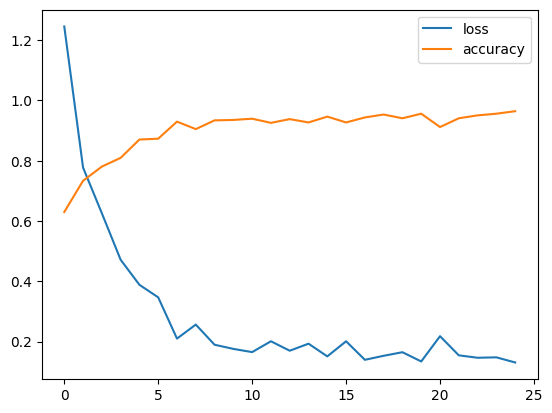

In [30]:
plt.plot(hist.history['loss'], label = "loss")
plt.plot(hist.history['accuracy'], label = "accuracy")
plt.legend()
plt.show()